<a href="https://colab.research.google.com/github/Manik400/Dental-Image-Classificctaion-Inception-V3/blob/main/Minor_Project_by_Manik_01116401521.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install kaggle
from google.colab import files

In [2]:
print("Please upload your kaggle.json file.")
files.upload()

Please upload your kaggle.json file.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manikgoyal400","key":"947c3c6265228fca68ebbae6fe1d3d34"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d snginh/teethdecay
!unzip teethdecay.zip -d teeth_data

Dataset URL: https://www.kaggle.com/datasets/snginh/teethdecay
License(s): other
 56% 9.00M/16.1M [00:00<00:00, 38.2MB/s]
100% 16.1M/16.1M [00:00<00:00, 61.0MB/s]
Archive:  teethdecay.zip
  inflating: teeth_data/teeth_dataset/test.csv  
  inflating: teeth_data/teeth_dataset/test/caries/wc1.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_0.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_1.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_10.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_11.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_12.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_13.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_14.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_15.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_16.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_17.jpg  
  inflating: teeth_data/teeth_dataset/test/caries/wc1_18.jpg  
  inflating:

In [20]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [12]:
train_path = 'teeth_data/teeth_dataset/train'
test_path = 'teeth_data/teeth_dataset/test'

In [17]:
# train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=30, horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1.0/255)

# train_data = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
# test_data = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')


train_generator = ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5, 1.5),
)
test_generator = ImageDataGenerator(rescale=1./255.)

train_datagen = train_generator.flow_from_directory(
    train_path,
    batch_size=10,
    target_size=(224, 224)
)
test_datagen = test_generator.flow_from_directory(
    test_path,
    batch_size=10,
    target_size=(224, 224)
)

Found 1260 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


In [18]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_inc = Model(inputs=base_model.input, outputs=predictions)

model_inc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_inc = model_inc.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


126/126 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5903 - loss: 0.8884 - val_accuracy: 0.7925 - val_loss: 0.4545
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7513 - loss: 0.6016 - val_accuracy: 0.7721 - val_loss: 0.5109
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.7876 - loss: 0.5088 - val_accuracy: 0.8197 - val_loss: 0.3998
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7996 - loss: 0.4917 - val_accuracy: 0.7755 - val_loss: 0.4148
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7975 - loss: 0.4494 - val_accuracy: 0.7789 - val_loss: 0.4272
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8156 - loss: 0.3958 - val_accuracy: 0.8435 - val_loss: 0.3545
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8381 - loss: 0.3939 - val_accuracy: 0.8163 - val_loss: 0.4065
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.8236 - loss: 0.3892 - val_accuracy: 0.816

In [21]:
# Creating holders to store the model performance results
Deep_Learning_Model = []
Training_accuracy = []
Validation_accuracy = []
Training_loss = []
Validation_loss = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  Deep_Learning_Model.append(model)
  Training_accuracy.append(round(a, 3))
  Validation_accuracy.append(round(b, 3))
  Training_loss.append(round(c, 3))
  Validation_loss.append(round(d, 3))

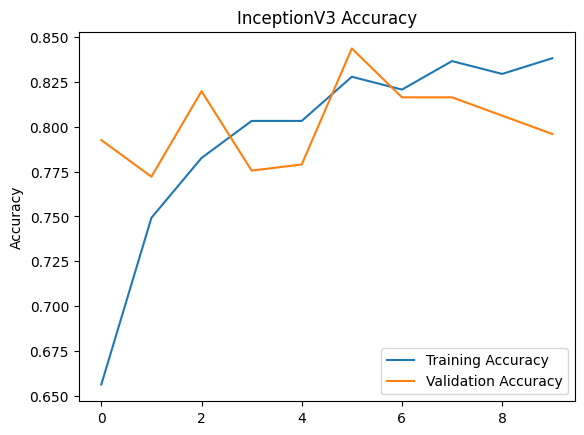

In [22]:
acc = hist_inc.history['accuracy']
val_acc = hist_inc.history['val_accuracy']

acc1 = hist_inc.history['accuracy'][-1]
val_acc1 = hist_inc.history['val_accuracy'][-1]

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Accuracy')
plt.show()

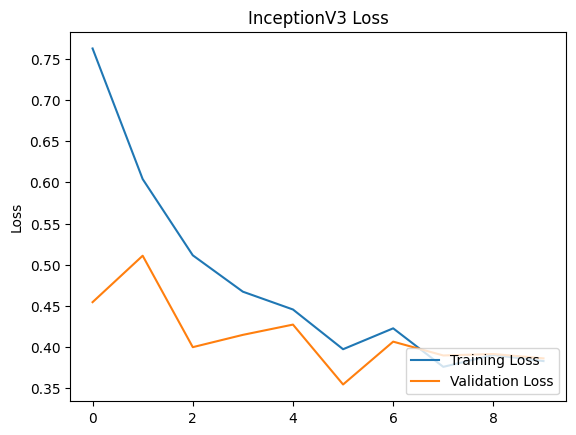

In [23]:
loss = hist_inc.history['loss']
val_loss = hist_inc.history['val_loss']

loss1 = hist_inc.history['loss'][-1]
val_loss1 = hist_inc.history['val_loss'][-1]

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Loss')
plt.show()

#storing the results. The below mentioned order of parameter passing is important.

storeResults('InceptionV3',acc1,val_acc1,
             loss1,val_loss1)